# Volatility

Volatility is how much the price of an investment goes up and down. It shows how much the price changes over time. High volatility means big price changes, while low volatility means more stable prices.

In statistics it's closely related to standard(Population) deviation.

In [1]:
/ Let's start with sample data

t: ("FF";enlist csv)0: read0 `:./data/sample_prices.csv
5#t

BLUE   ORANGE 
--------------
8.7    10.66  
8.9055 11.0828
8.7113 10.71  
8.4346 11.5907
8.7254 12.107 


In [2]:
/ Find the percentage changes

update BLUE:(BLUE % prev BLUE)-1, ORANGE:(ORANGE % prev ORANGE)-1 from `t;
delete from `t where i =0; / or 1_t
t

BLUE        ORANGE     
-----------------------
0.02362069  0.03966229 
-0.02180675 -0.03363771
-0.03176334 0.08223156 
0.03447704  0.04454433 
0.03778623  -0.02638143
-0.01145211 -0.04918728
0.03267645  0.1170078  
-0.01258127 0.06735255 
0.02958061  0.07824942 
0.006150507 -0.1682607 
0.01216236  0.02404099 
0.02114854  -0.05562346


In [3]:
/ Lets compute the standard deviation
/Inbuild kdb function "dev"

(dev each flip t)

BLUE  | 0.02295663
ORANGE| 0.07621241


**Standard Deviation Formula:**

σ = sqrt( ( Σ (xᵢ - μ)² ) / N )

Where:
- σ = Standard Deviation
- Σ = Sum of...
- xᵢ = Each individual data point
- μ = Mean (average of the data points)
- N = Number of data points


In [4]:
/ with formula,getting same result

avrg: avg t`BLUE

sqrt avg (((t`BLUE) - avrg) xexp 2)

0.02295663


**Annualized Volatility Formula:**

$$ \text{Annualized Volatility} = \sigma \times \sqrt{T} $$

Where:
- $\sigma$ = Standard deviation of returns over the chosen period (daily, weekly, or monthly)
- $T$ = Number of periods in a year:
  - Daily returns: $T = 252$
  - Weekly returns: $T = 52$
  - Monthly returns: $T = 12$


In [5]:
/ Compute the annualize volatility

(dev each flip t)*sqrt(12)

BLUE  | 0.0795241
ORANGE| 0.2640075


Orange has higher volatility, meaning its price changes are more significant compared to Blue.

# Risk Adjusted Returns

In [6]:
/ load hedge fund returns data
/ source: edhec business school open data source

returns : ("J",19#"F";enlist csv)0: `:./data/Portfolios_Formed_on_ME_monthly_EW.csv

/return header 5 rows

5#returns

x      <= 0   Lo 30 Med 40 Hi 30 Lo 20 Qnt 2 Qnt 3 Qnt 4 Hi 20 Lo 10 Dec 2 De..
-----------------------------------------------------------------------------..
192607 -99.99 -0.43 1.52   2.68  -0.57 0.59  1.6   1.47  3.33  -1.45 0.29  -0..
192608 -99.99 3.9   3.04   2.09  3.84  3.59  3.71  1.61  2.33  5.12  2.59  4...
192609 -99.99 -1.08 -0.54  0.16  -0.48 -1.4  0     -0.5  -0.09 0.93  -1.87 -2..
192610 -99.99 -3.32 -3.52  -3.06 -3.29 -4.1  -2.89 -3.36 -2.95 -4.84 -1.77 -3..
192611 -99.99 -0.46 3.82   3.09  -0.55 2.18  3.41  3.39  3.16  -0.78 -0.32 -0..


In [7]:
/ Chenge the columns name. Kdb doesn't recognize the column name with space

returns : (`$ ssr[;" ";""] each string cols returns) xcol returns;
5#returns

x      <=0    Lo30  Med40 Hi30  Lo20  Qnt2 Qnt3  Qnt4  Hi20  Lo10  Dec2  Dec3..
-----------------------------------------------------------------------------..
192607 -99.99 -0.43 1.52  2.68  -0.57 0.59 1.6   1.47  3.33  -1.45 0.29  -0.1..
192608 -99.99 3.9   3.04  2.09  3.84  3.59 3.71  1.61  2.33  5.12  2.59  4.03..
192609 -99.99 -1.08 -0.54 0.16  -0.48 -1.4 0     -0.5  -0.09 0.93  -1.87 -2.2..
192610 -99.99 -3.32 -3.52 -3.06 -3.29 -4.1 -2.89 -3.36 -2.95 -4.84 -1.77 -3.3..
192611 -99.99 -0.46 3.82  3.09  -0.55 2.18 3.41  3.39  3.16  -0.78 -0.32 -0.2..


Let's analyse which industry gives more return. Consider Smallcap and Largecap price retunrs

In [8]:
/ Focus on Lo10 and Hi10 columns

returns: select Month:x,Lo10, Hi10 from returns

In [9]:
/ Devide the values with 100

returns : returns%100

5#returns

Month   Lo10    Hi10   
-----------------------
1926.07 -0.0145 0.0329 
1926.08 0.0512  0.037  
1926.09 0.0093  0.0067 
1926.1  -0.0484 -0.0243
1926.11 -0.0078 0.027  


In [10]:
/ Rename Lo10 as SmallCap and Hi10 as Largecap

returns : (`Lo10`Hi10!`SmallCap`LargeCap) xcol returns 

2#returns

Month   SmallCap LargeCap
-------------------------
1926.07 -0.0145  0.0329  
1926.08 0.0512   0.037   


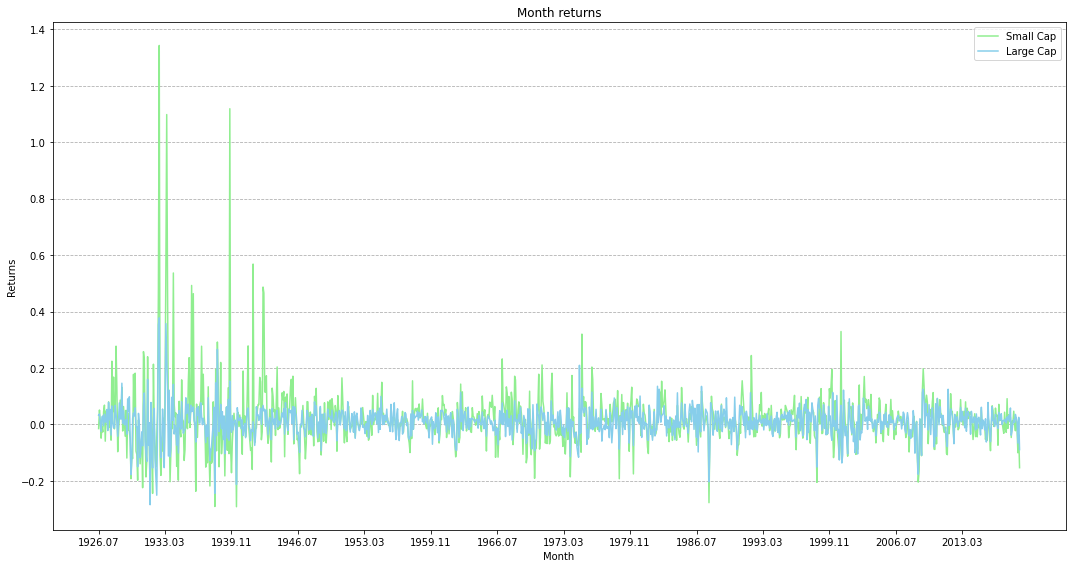

In [11]:
/Use embedpy to create visuals, getting help from beloved python.

p)import matplotlib.pyplot as plt
p)import numpy as np

/pass the month and returns list to python environment
.p.set[`months;string returns`Month]
.p.set[`SmallCap;returns`SmallCap]
.p.set[`LargeCap;returns`LargeCap]

p)plt.figure(figsize=(15,8))
p)plt.plot(months,SmallCap, color='lightgreen',label='Small Cap');
p)plt.plot(months, LargeCap, color = 'skyblue', label = 'Large Cap');

/Titles
p)plt.title("Month returns")
p)plt.xlabel("Month")
p)plt.ylabel("Returns")

p)selected_months = np.arange(0, len(months), 80)
p)plt.xticks(selected_months, [months[i] for i in selected_months])

p)plt.grid(axis='y', linestyle='--');
p)plt.legend();
p)plt.tight_layout();
p)plt.show();


In [12]:
rets: delete Month from returns;

/Annualize volatility

annualized_vol: (dev each flip rets)*sqrt(12)
annualized_vol

SmallCap| 0.3680272
LargeCap| 0.1866319


**Small Cap** is having more volatility than Large Cap

In [13]:
/ Annualize returns per month

((prd(rets + 1)) xexp (1%count rets))-1

SmallCap| 0.01298637
LargeCap| 0.007423424


In [14]:

/ Annualize returns

annualized_return: ((prd(rets + 1)) xexp (12%count rets))-1
annualized_return

SmallCap| 0.1674633
LargeCap| 0.09280968


But small cap yeild more returns than large cap.

In [15]:
/ Find the sharpe ratio

/ sharpe ratio is adjusted return with risk free rate and volatility

riskfree_rate : 0.03 / Govt bond rate
excess_return : annualized_return - riskfree_rate
sharpe_ratio : excess_return%annualized_vol
sharpe_ratio

SmallCap| 0.373514
LargeCap| 0.3365432


After we adjust return with volatility and risk free rate, Small cap is yeild more return than large cap.

Key Takeaways:

* Volatility is a measure of price fluctuation.
* Risk-adjusted returns consider both return and risk.
* The Sharpe Ratio is a popular metric for assessing risk-adjusted returns.